In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})
import pandas as pd
import os

from shared_casual_discovery import *

In [2]:

def plot_result(model_weights_hist, ax, epoch=-1):

    light_green = (0.8, 1.0, 0.8)  # A very light green
    light_red = (1.0, 0.8, 0.8)    # A very light red

    if abs(np.sum(model_weights_hist[:-1,:])) < 1e-5:
        pass
    elif model_weights_hist[epoch,0] > 0:
        ax.set_facecolor(light_green)
    else:
        ax.set_facecolor(light_red)

    for j, name in zip(range(2), ['x->y', 'y->x']):
        ax.plot(model_weights_hist[:,j], label=name)
    
    ax.hlines(0, -1, model_weights_hist.shape[0]+1, linestyle='dashed', color='r') 
    ax.grid()


In [3]:

def collect_data(df, lr=2e-2, use_lowest_loss=False):

    ##############################################################
    # Collect data with different starting M-matrix
    Ns  = 6
    x   = np.linspace(0.1, 1, Ns)
    X,Y = np.meshgrid(x,x)
    
    all_model_weights = []
    opt_epochs = []
    for i in range(Ns):
        for j in range(Ns):
    
            seed_values = [X[i,j], Y[i,j]]
            M      = np.zeros((2,2))
            M[0,1] = seed_values[0]; 
            M[1,0] = seed_values[1]; 
            
            mse_losses, model_weights_hist, opt_epoch = find_direction(
                                df, 
                                M=M,
                                epochs=2000,
                                pretrain_epochs = 100, pre_lr = 1e-2,
                                d1_weight = 1.0, lr = lr,
                                rng_seed=7,
                                plots=False,
                                use_lowest_loss=use_lowest_loss
                                )
        
            out            = model_weights_hist[opt_epoch-1,:]
            comp_direction = 1 if out[0] > 0  else -1
        
            weights_str = f"({out[0]:1.3f}, {out[1]:1.3f})"
            print(f"weights={weights_str}, comp direction={comp_direction:2d}, opt_epoch={opt_epoch}")
    
            all_model_weights.append(model_weights_hist)
            opt_epochs.append(opt_epoch)

    ##############################################################
    # Plot results
    
    fig, axs = plt.subplots(Ns, Ns, figsize=(15,15), sharex='col', sharey='row')
    
    count = 0
    for i in range(Ns):
        for j in range(Ns):
            seed_values = [X[i,j], Y[i,j]]   
            

            if use_lowest_loss:
                opt_epoch = opt_epochs[count]-1
                all_weights = all_model_weights[count].ravel()
                axs[i,j].vlines(opt_epoch, all_weights.min(), all_weights.max(), 
                                linestyle='dotted', color='k', label="opt_loss")
            else:
                opt_epoch = -1

            plot_result(all_model_weights[count], axs[i,j], epoch=opt_epoch)
            
            count += 1
    
            if i == 0:
                axs[i,j].set_title(f"$W_x$={seed_values[0]:1.3}"); 
            if j == 0:
                axs[i,j].set_ylabel(f"$W_y$={seed_values[1]:1.3}"); 
    
            axs[i,j].scatter(0, seed_values[0], 
                    marker='o', s=60, label='start(n=0)', color='b')
            axs[i,j].scatter(0, seed_values[1], 
                    marker='o', s=60, label='start(n=1)', color='orange')

    #########################################
    # Shared legend for all subplots
    unique_labels = set()
    handles_labels = []
    
    # Extract handles and labels from each subplot
    for ax in axs.flat:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            # Check if we have seen this label already
            if label not in unique_labels:
                handles_labels.append((handle, label))
                unique_labels.add(label)
    
    handles, labels = zip(*handles_labels)
    # reorder for clarity 
    handles = handles[2:] + handles[:2]
    labels  = labels[2:] + labels[:2]
    
    fig.legend(handles, labels, bbox_to_anchor=(0.1, 1.0, 0.85, 0.2), 
               loc="lower left", mode="expand", 
               borderaxespad=0, ncol=5, fontsize=16)
        
    fig.suptitle(f'Learning with variable initial edge-weights: lr={lr:1.1e}')
    fig.supxlabel('epoch')
    fig.supylabel('edge weight magnitude')
    plt.tight_layout()
    plt.show()


# Generate toy problem

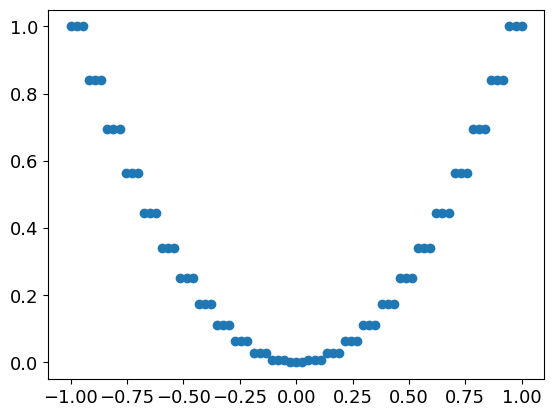

In [4]:
x = np.linspace(-1,1,75)
y = np.linspace(-1,1,25)**2
y = np.repeat(y, 3, 0)
attr = ['x', 'y']
#df = torch.tensor(np.stack([x,y], axis=-1))

df = pd.DataFrame({'x':x, 'y':y})
plt.scatter(x,y);  plt.show()



# Identify the effect of learning rate on the accuracy

weights=(-0.436, 0.436), comp direction=-1, opt_epoch=2000
weights=(-0.289, 0.289), comp direction=-1, opt_epoch=2000
weights=(-0.270, 0.270), comp direction=-1, opt_epoch=2000
weights=(-0.135, 0.135), comp direction=-1, opt_epoch=2000
weights=(0.106, -0.106), comp direction= 1, opt_epoch=2000
weights=(0.722, -0.722), comp direction= 1, opt_epoch=2000
weights=(-0.301, 0.301), comp direction=-1, opt_epoch=2000
weights=(-0.196, 0.196), comp direction=-1, opt_epoch=2000
weights=(-0.190, 0.190), comp direction=-1, opt_epoch=2000
weights=(0.009, -0.009), comp direction= 1, opt_epoch=2000
weights=(0.151, -0.151), comp direction= 1, opt_epoch=2000
weights=(0.230, -0.230), comp direction= 1, opt_epoch=2000
weights=(0.079, -0.079), comp direction= 1, opt_epoch=2000
weights=(-0.283, 0.283), comp direction=-1, opt_epoch=2000
weights=(-0.155, 0.155), comp direction=-1, opt_epoch=2000
weights=(-0.026, 0.026), comp direction=-1, opt_epoch=2000
weights=(0.149, -0.149), comp direction= 1, opt_epoch=20

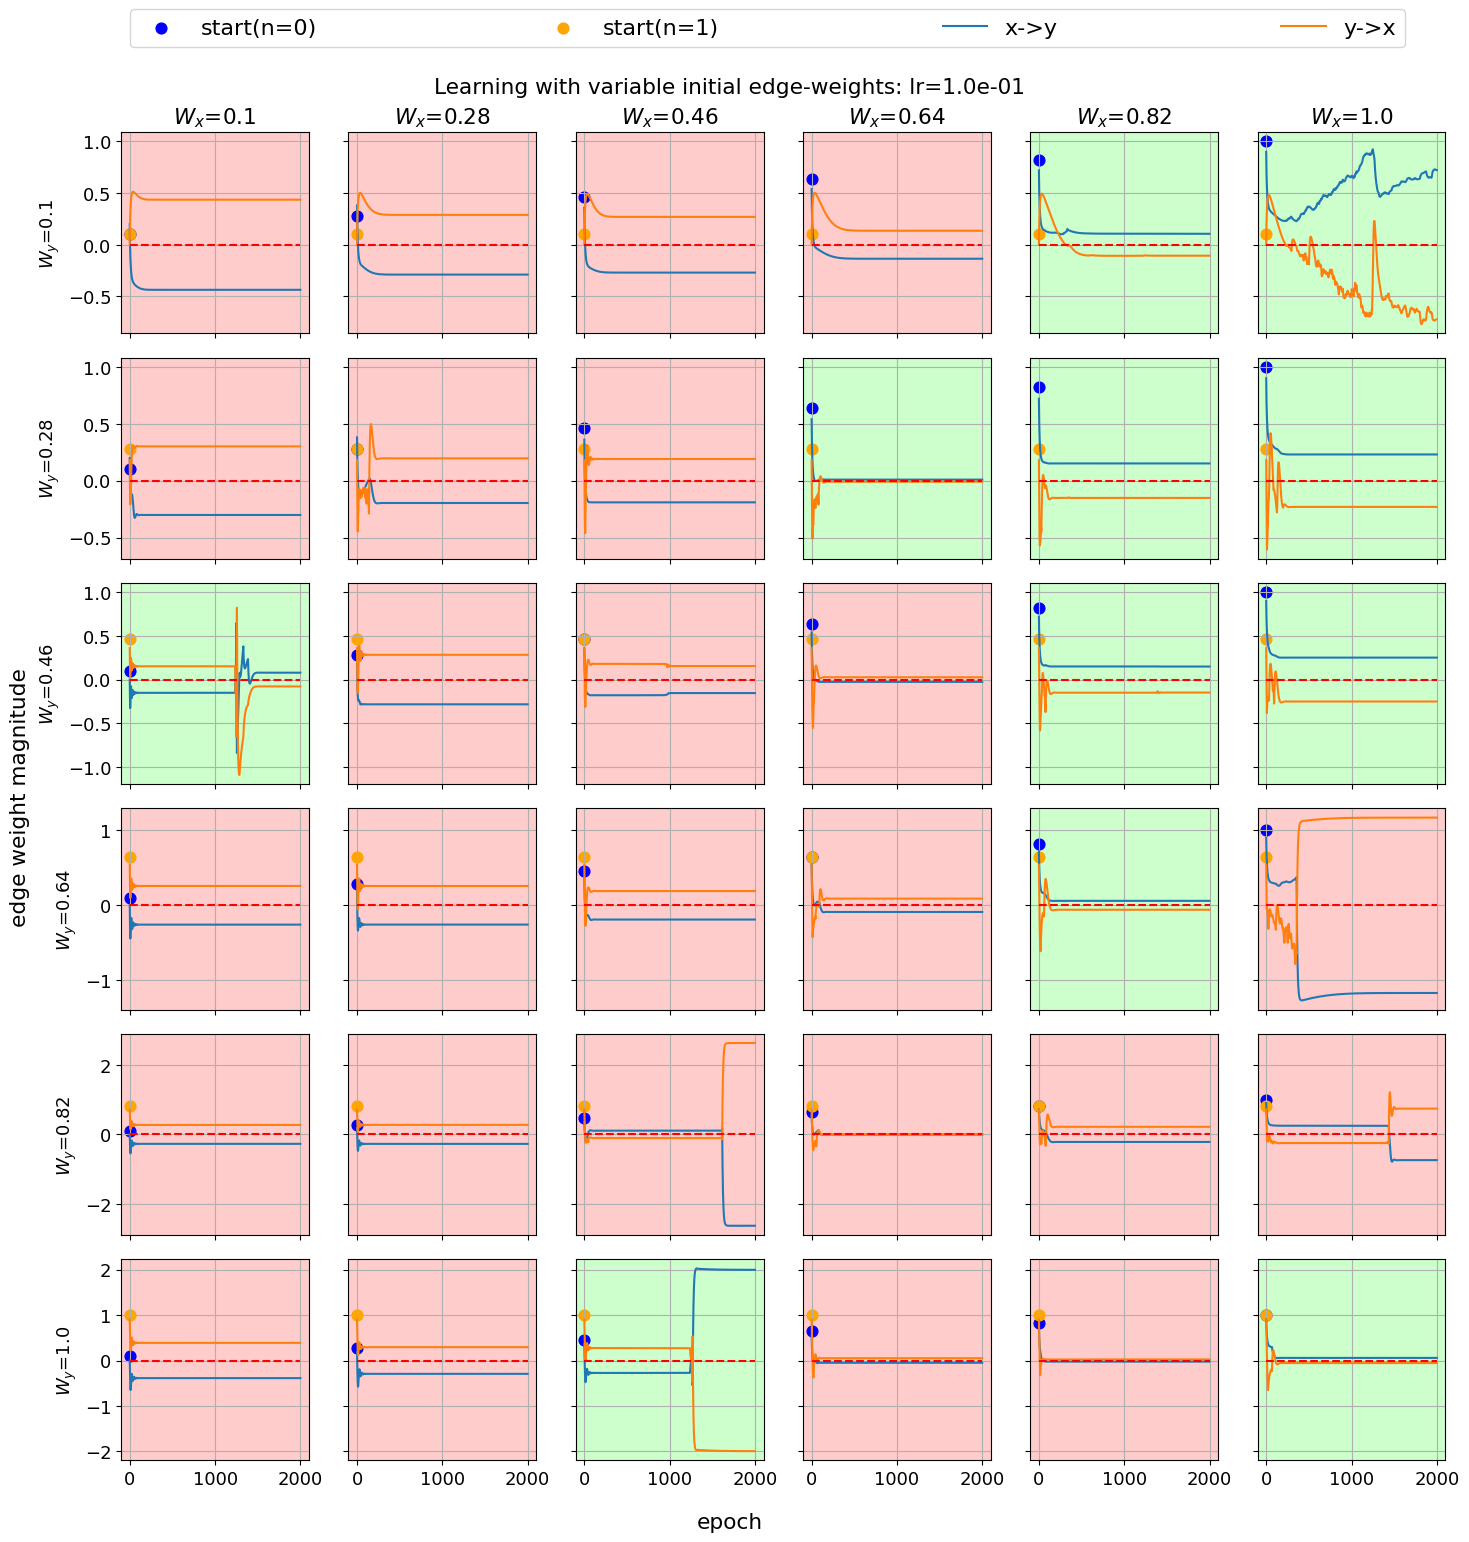

weights=(-0.204, 0.204), comp direction=-1, opt_epoch=2000
weights=(-0.077, 0.077), comp direction=-1, opt_epoch=2000
weights=(-0.111, 0.111), comp direction=-1, opt_epoch=2000
weights=(-0.229, 0.229), comp direction=-1, opt_epoch=2000
weights=(0.085, -0.085), comp direction= 1, opt_epoch=2000
weights=(2.131, -1.866), comp direction= 1, opt_epoch=2000
weights=(-0.034, 0.034), comp direction=-1, opt_epoch=2000
weights=(2.187, -2.187), comp direction= 1, opt_epoch=2000
weights=(0.085, -0.085), comp direction= 1, opt_epoch=2000
weights=(-0.384, 0.384), comp direction=-1, opt_epoch=2000
weights=(0.744, -0.744), comp direction= 1, opt_epoch=2000
weights=(3.363, -3.353), comp direction= 1, opt_epoch=2000
weights=(-0.175, 0.175), comp direction=-1, opt_epoch=2000
weights=(-0.063, 0.063), comp direction=-1, opt_epoch=2000
weights=(0.088, -0.088), comp direction= 1, opt_epoch=2000
weights=(-0.388, 0.388), comp direction=-1, opt_epoch=2000
weights=(0.145, -0.145), comp direction= 1, opt_epoch=20

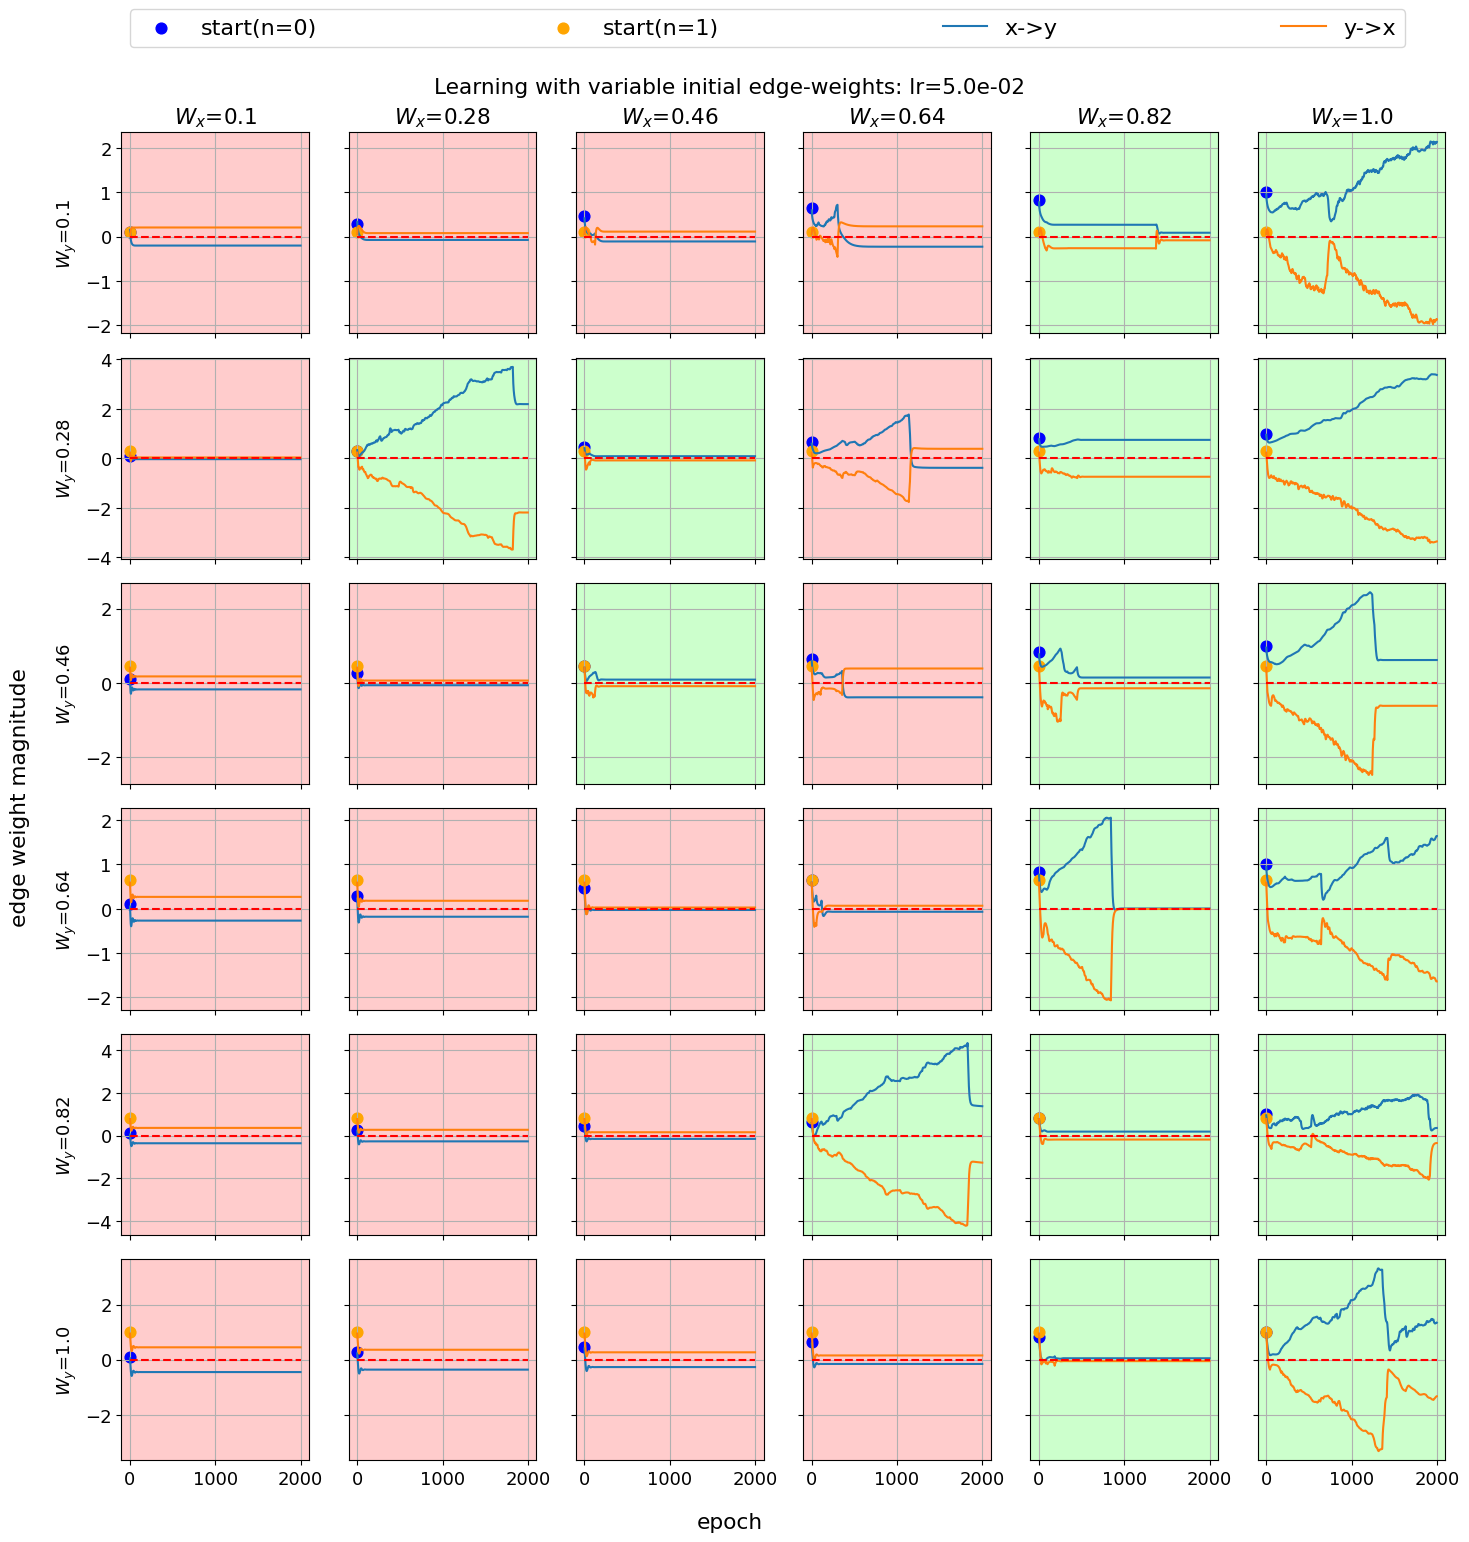

weights=(1.167, -0.968), comp direction= 1, opt_epoch=2000
weights=(1.272, -1.063), comp direction= 1, opt_epoch=2000
weights=(1.234, -1.037), comp direction= 1, opt_epoch=2000
weights=(1.295, -1.101), comp direction= 1, opt_epoch=2000
weights=(1.286, -1.095), comp direction= 1, opt_epoch=2000
weights=(1.293, -1.117), comp direction= 1, opt_epoch=2000
weights=(1.123, -0.925), comp direction= 1, opt_epoch=2000
weights=(1.191, -0.985), comp direction= 1, opt_epoch=2000
weights=(1.208, -1.009), comp direction= 1, opt_epoch=2000
weights=(1.188, -1.008), comp direction= 1, opt_epoch=2000
weights=(1.087, -1.300), comp direction= 1, opt_epoch=2000
weights=(1.242, -1.050), comp direction= 1, opt_epoch=2000
weights=(-0.183, 0.183), comp direction=-1, opt_epoch=2000
weights=(1.166, -0.965), comp direction= 1, opt_epoch=2000
weights=(1.138, -0.953), comp direction= 1, opt_epoch=2000
weights=(1.179, -0.994), comp direction= 1, opt_epoch=2000
weights=(1.192, -1.007), comp direction= 1, opt_epoch=20

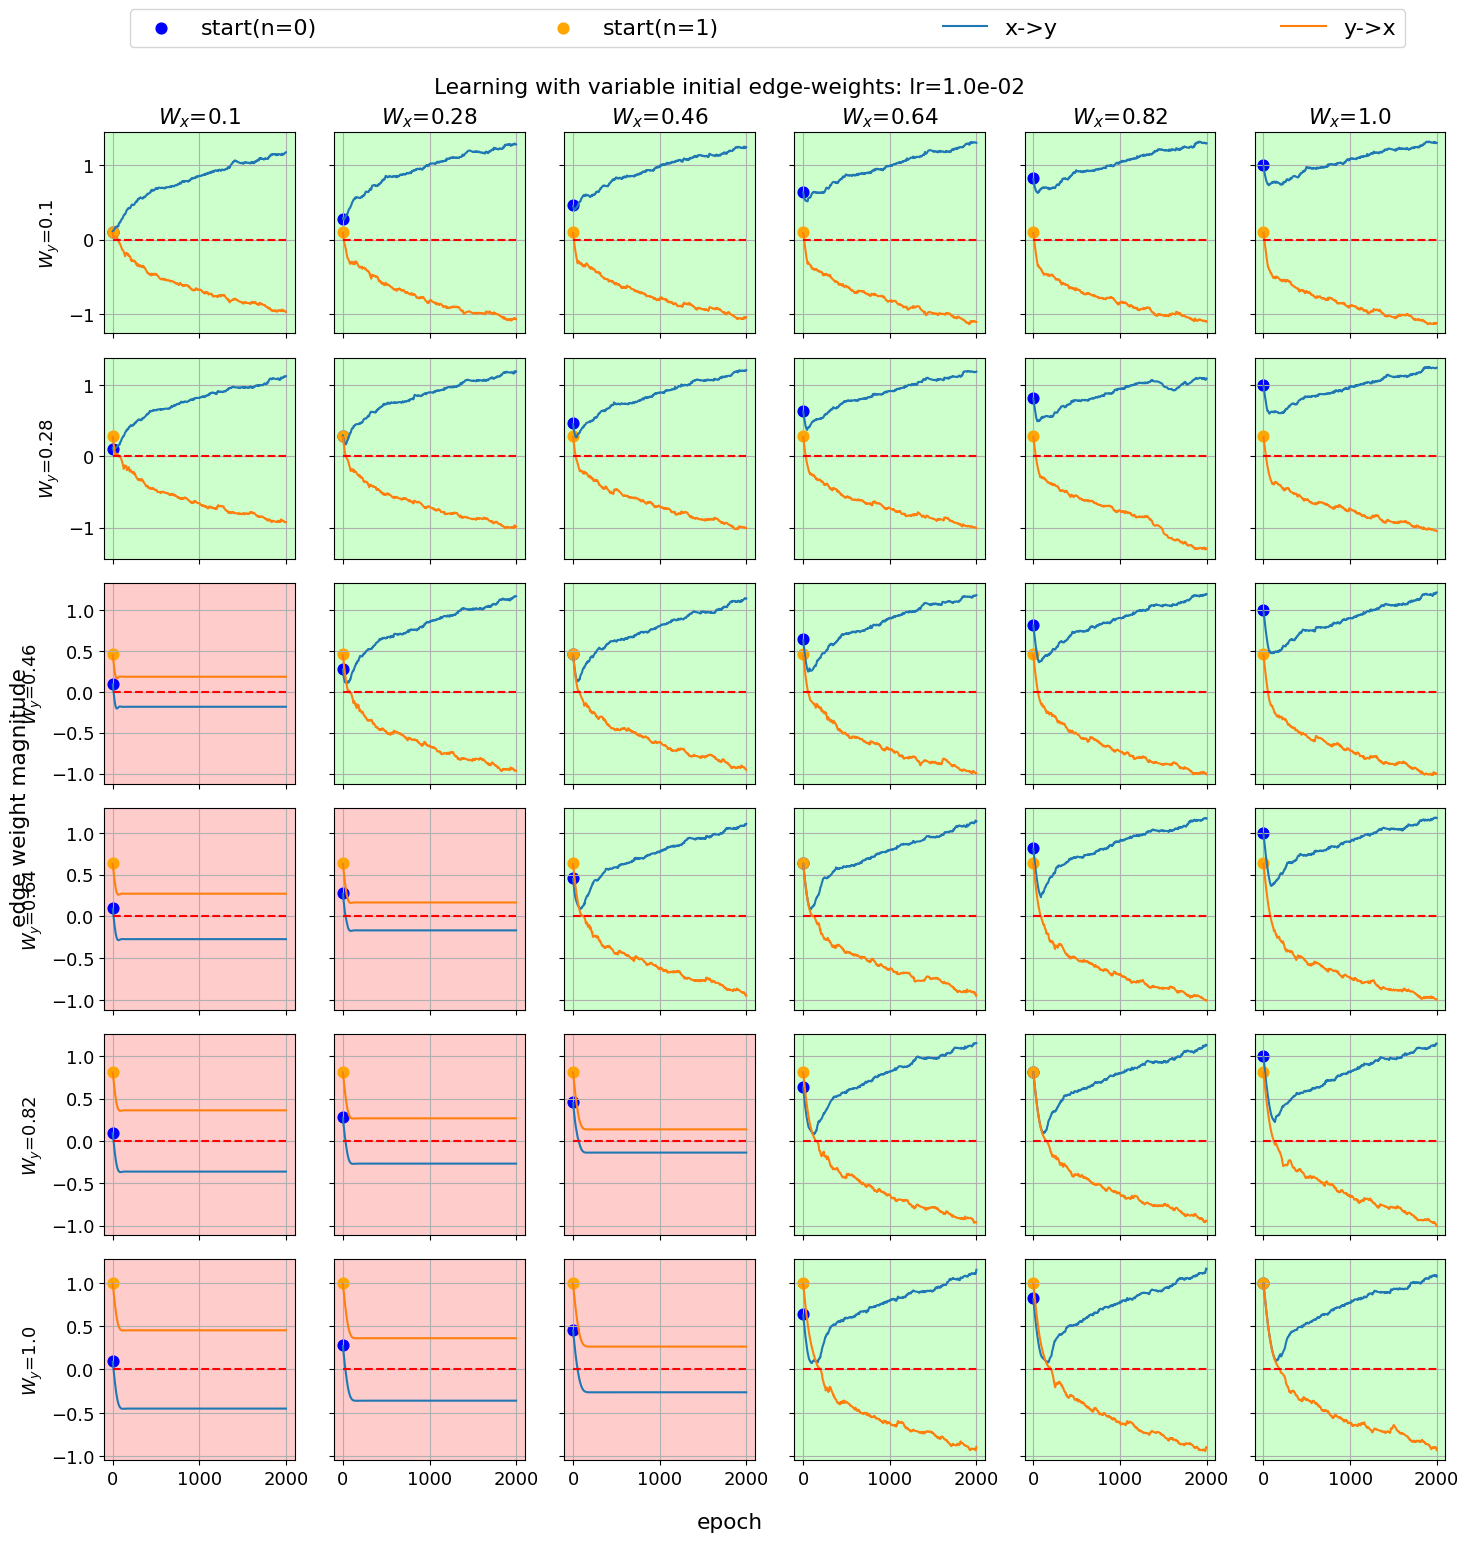

weights=(0.828, -0.693), comp direction= 1, opt_epoch=2000
weights=(0.875, -0.726), comp direction= 1, opt_epoch=2000
weights=(0.905, -0.756), comp direction= 1, opt_epoch=2000
weights=(0.935, -0.791), comp direction= 1, opt_epoch=2000
weights=(0.983, -0.828), comp direction= 1, opt_epoch=2000
weights=(0.999, -0.846), comp direction= 1, opt_epoch=2000
weights=(0.823, -0.693), comp direction= 1, opt_epoch=2000
weights=(0.844, -0.703), comp direction= 1, opt_epoch=2000
weights=(0.859, -0.720), comp direction= 1, opt_epoch=2000
weights=(0.902, -0.761), comp direction= 1, opt_epoch=2000
weights=(0.955, -0.803), comp direction= 1, opt_epoch=2000
weights=(0.974, -0.802), comp direction= 1, opt_epoch=2000
weights=(-0.184, 0.184), comp direction=-1, opt_epoch=2000
weights=(0.801, -0.670), comp direction= 1, opt_epoch=2000
weights=(0.801, -0.658), comp direction= 1, opt_epoch=2000
weights=(0.851, -0.720), comp direction= 1, opt_epoch=2000
weights=(0.900, -0.757), comp direction= 1, opt_epoch=20

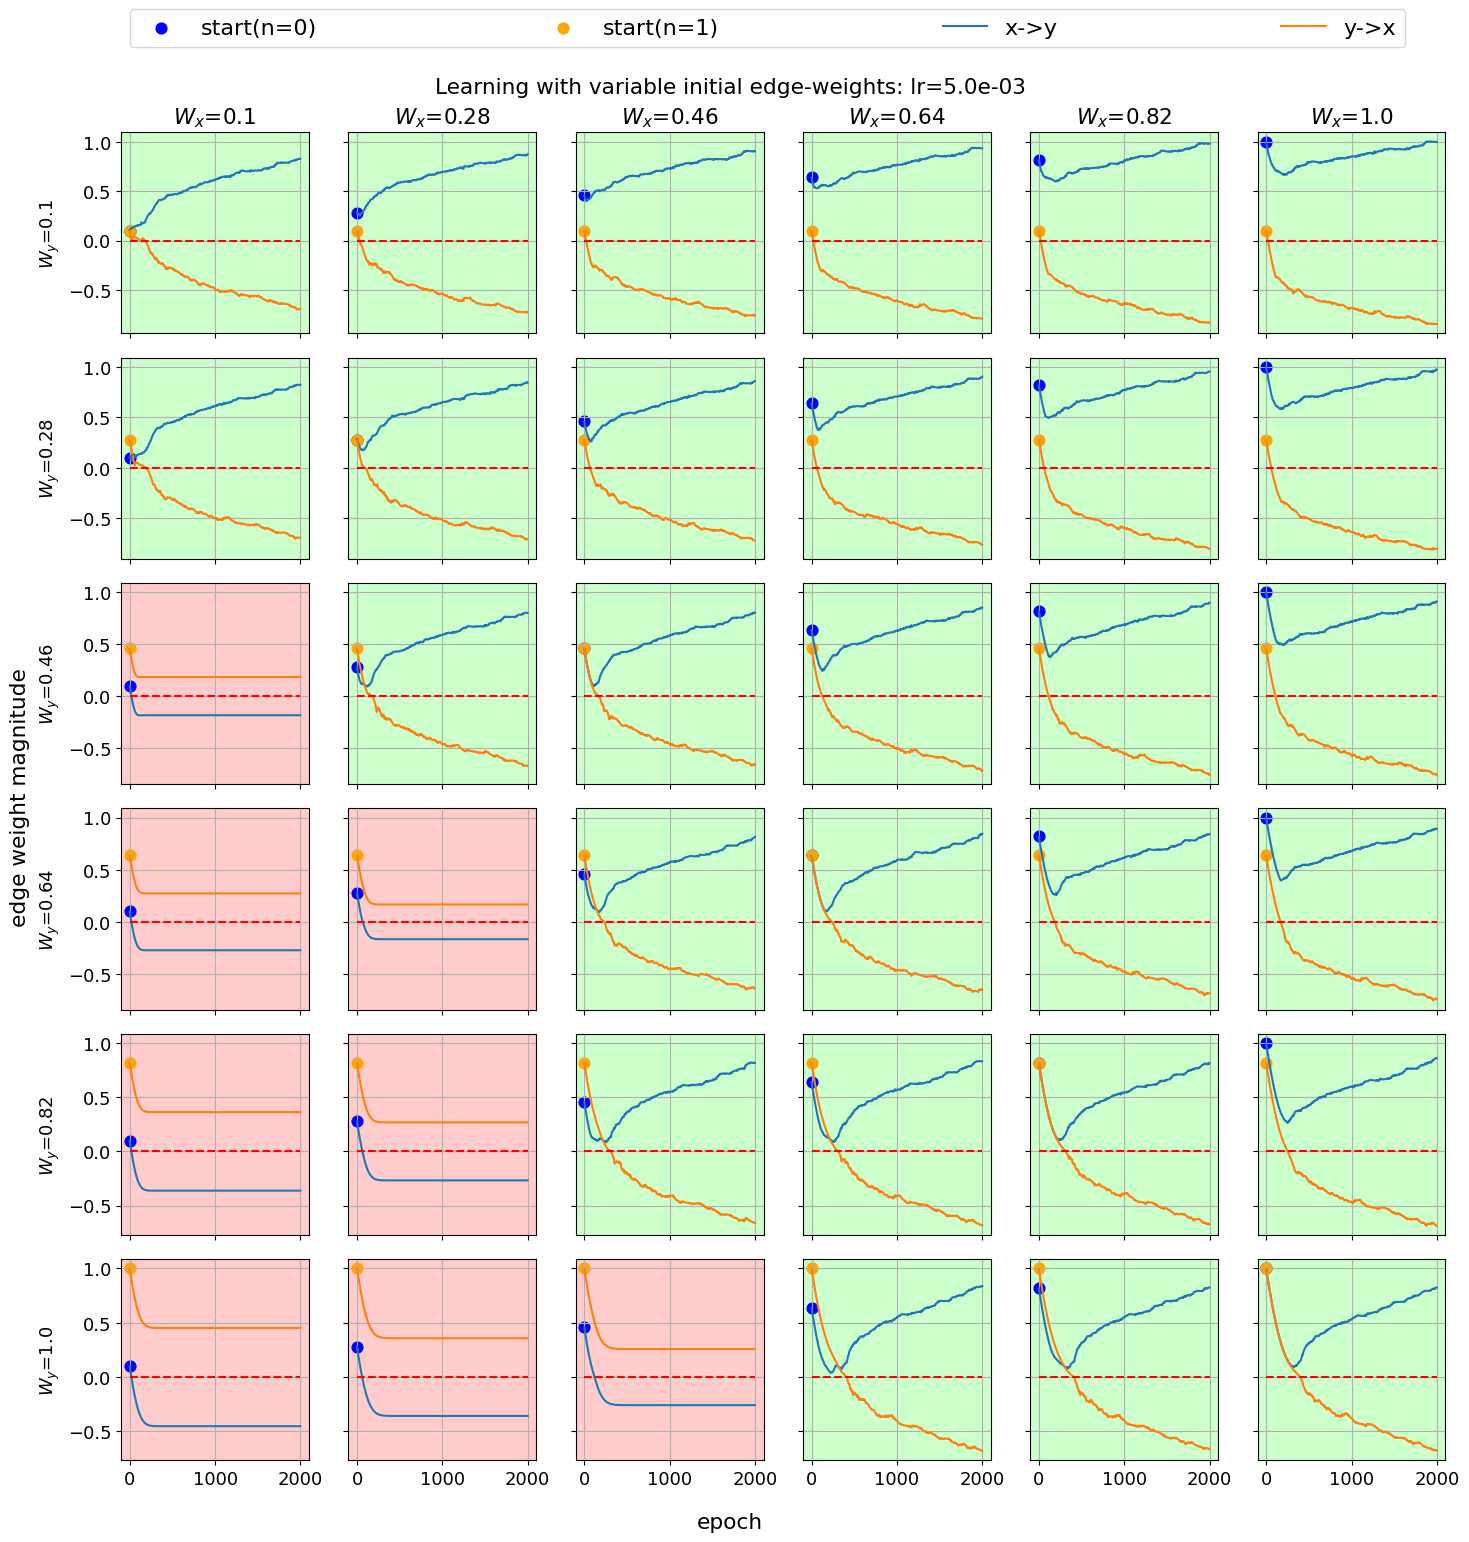

In [5]:

for lr in [1e-1, 5e-2, 1e-2, 5e-3]:
    collect_data(df, lr=lr)

# Instead of using the last parameter set, use parameter set corresponding to the lowest loss

weights=(-0.436, 0.436), comp direction=-1, opt_epoch=1800
weights=(-0.289, 0.289), comp direction=-1, opt_epoch=870
weights=(-0.270, 0.270), comp direction=-1, opt_epoch=710
weights=(0.006, 0.499), comp direction= 1, opt_epoch=30
weights=(0.131, -0.002), comp direction= 1, opt_epoch=325
weights=(0.604, -0.420), comp direction= 1, opt_epoch=875
weights=(-0.301, 0.301), comp direction=-1, opt_epoch=1700
weights=(-0.097, -0.079), comp direction=-1, opt_epoch=70
weights=(-0.190, 0.190), comp direction=-1, opt_epoch=970
weights=(-0.001, -0.143), comp direction=-1, opt_epoch=65
weights=(0.161, 0.017), comp direction= 1, opt_epoch=60
weights=(0.300, -0.042), comp direction= 1, opt_epoch=85
weights=(0.304, -0.707), comp direction= 1, opt_epoch=1325
weights=(-0.283, 0.283), comp direction=-1, opt_epoch=355
weights=(-0.155, 0.155), comp direction=-1, opt_epoch=1275
weights=(0.001, 0.064), comp direction= 1, opt_epoch=40
weights=(0.165, -0.278), comp direction= 1, opt_epoch=75
weights=(0.287, 0.

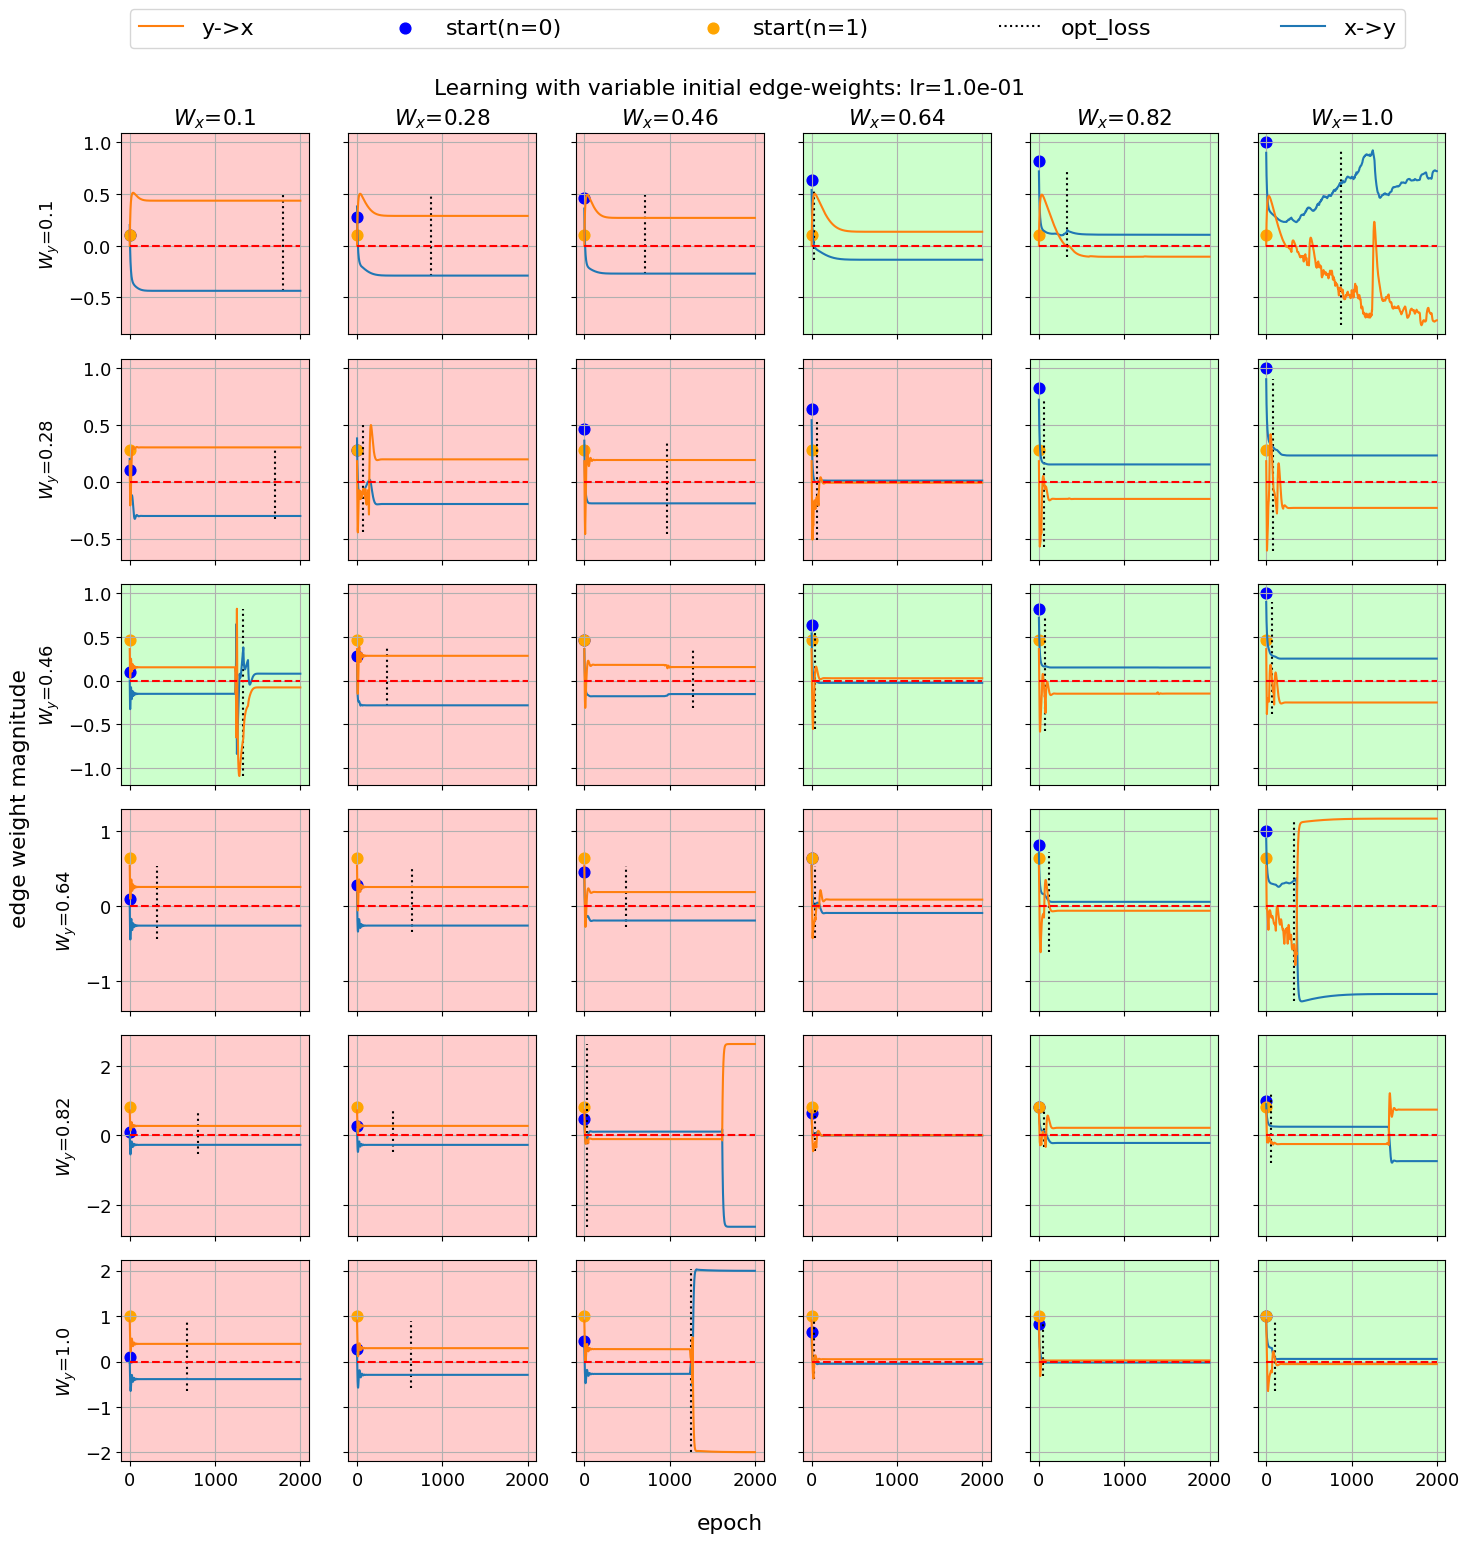

weights=(-0.204, 0.204), comp direction=-1, opt_epoch=775
weights=(0.004, 0.210), comp direction= 1, opt_epoch=35
weights=(0.055, 0.015), comp direction= 1, opt_epoch=65
weights=(0.318, -0.037), comp direction= 1, opt_epoch=80
weights=(0.432, 0.041), comp direction= 1, opt_epoch=35
weights=(0.893, -1.150), comp direction= 1, opt_epoch=540
weights=(-0.034, 0.034), comp direction=-1, opt_epoch=1960
weights=(1.993, -1.961), comp direction= 1, opt_epoch=945
weights=(0.181, -0.173), comp direction= 1, opt_epoch=55
weights=(0.658, -0.681), comp direction= 1, opt_epoch=485
weights=(0.511, -0.558), comp direction= 1, opt_epoch=140
weights=(2.463, -2.474), comp direction= 1, opt_epoch=1215
weights=(-0.175, 0.175), comp direction=-1, opt_epoch=580
weights=(-0.063, 0.063), comp direction=-1, opt_epoch=1865
weights=(0.147, -0.272), comp direction= 1, opt_epoch=50
weights=(0.240, -0.297), comp direction= 1, opt_epoch=50
weights=(0.512, -0.600), comp direction= 1, opt_epoch=100
weights=(1.081, -1.13

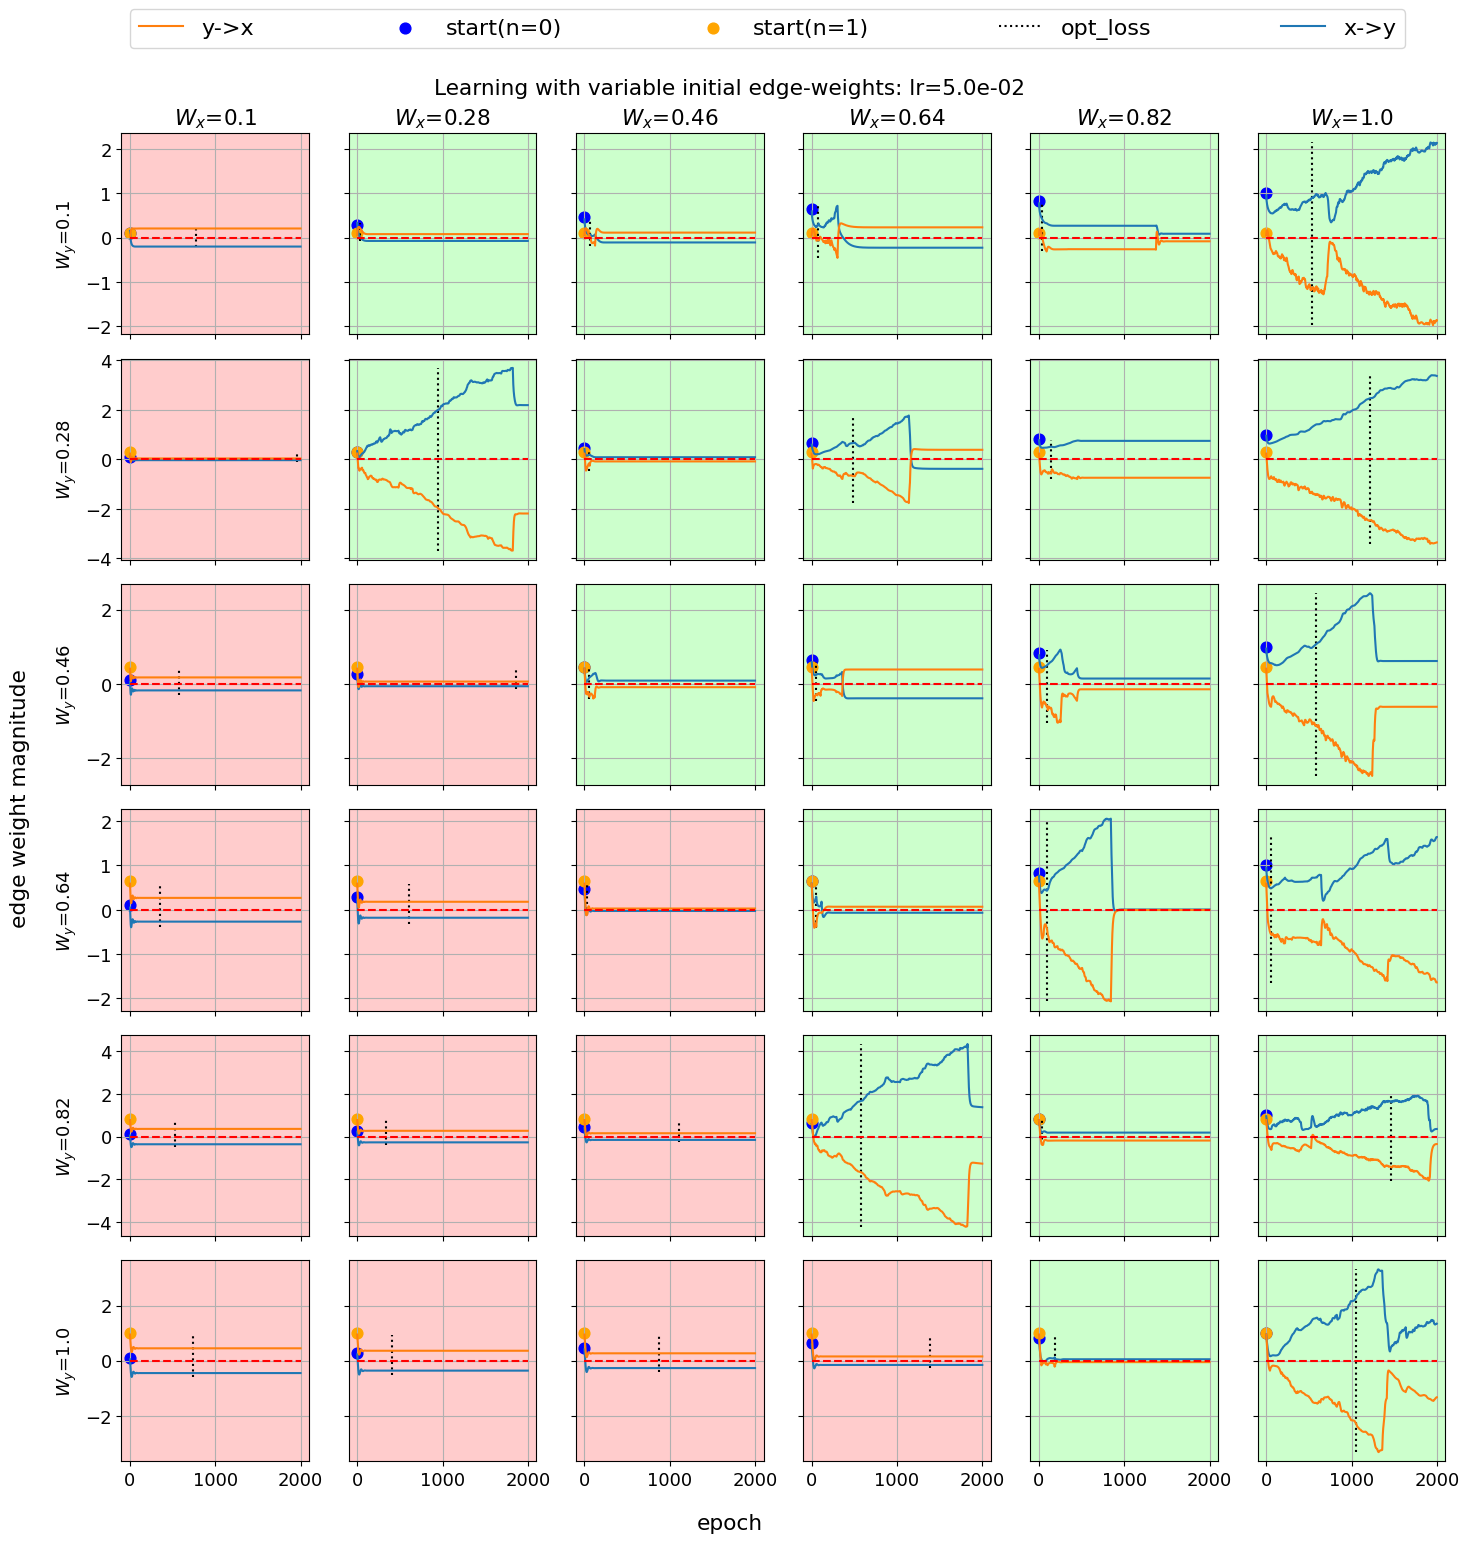

weights=(0.726, -0.582), comp direction= 1, opt_epoch=725
weights=(0.940, -0.784), comp direction= 1, opt_epoch=880
weights=(0.924, -0.765), comp direction= 1, opt_epoch=910
weights=(0.897, -0.748), comp direction= 1, opt_epoch=770
weights=(0.947, -0.778), comp direction= 1, opt_epoch=780
weights=(1.205, -1.034), comp direction= 1, opt_epoch=1490
weights=(0.833, -0.703), comp direction= 1, opt_epoch=1065
weights=(0.779, -0.622), comp direction= 1, opt_epoch=755
weights=(0.748, -0.575), comp direction= 1, opt_epoch=665
weights=(0.827, -0.666), comp direction= 1, opt_epoch=760
weights=(0.833, -0.684), comp direction= 1, opt_epoch=775
weights=(0.609, -0.422), comp direction= 1, opt_epoch=205
weights=(-0.183, 0.183), comp direction=-1, opt_epoch=980
weights=(0.772, -0.626), comp direction= 1, opt_epoch=880
weights=(0.761, -0.628), comp direction= 1, opt_epoch=920
weights=(0.768, -0.625), comp direction= 1, opt_epoch=735
weights=(1.052, -0.887), comp direction= 1, opt_epoch=1570
weights=(0.

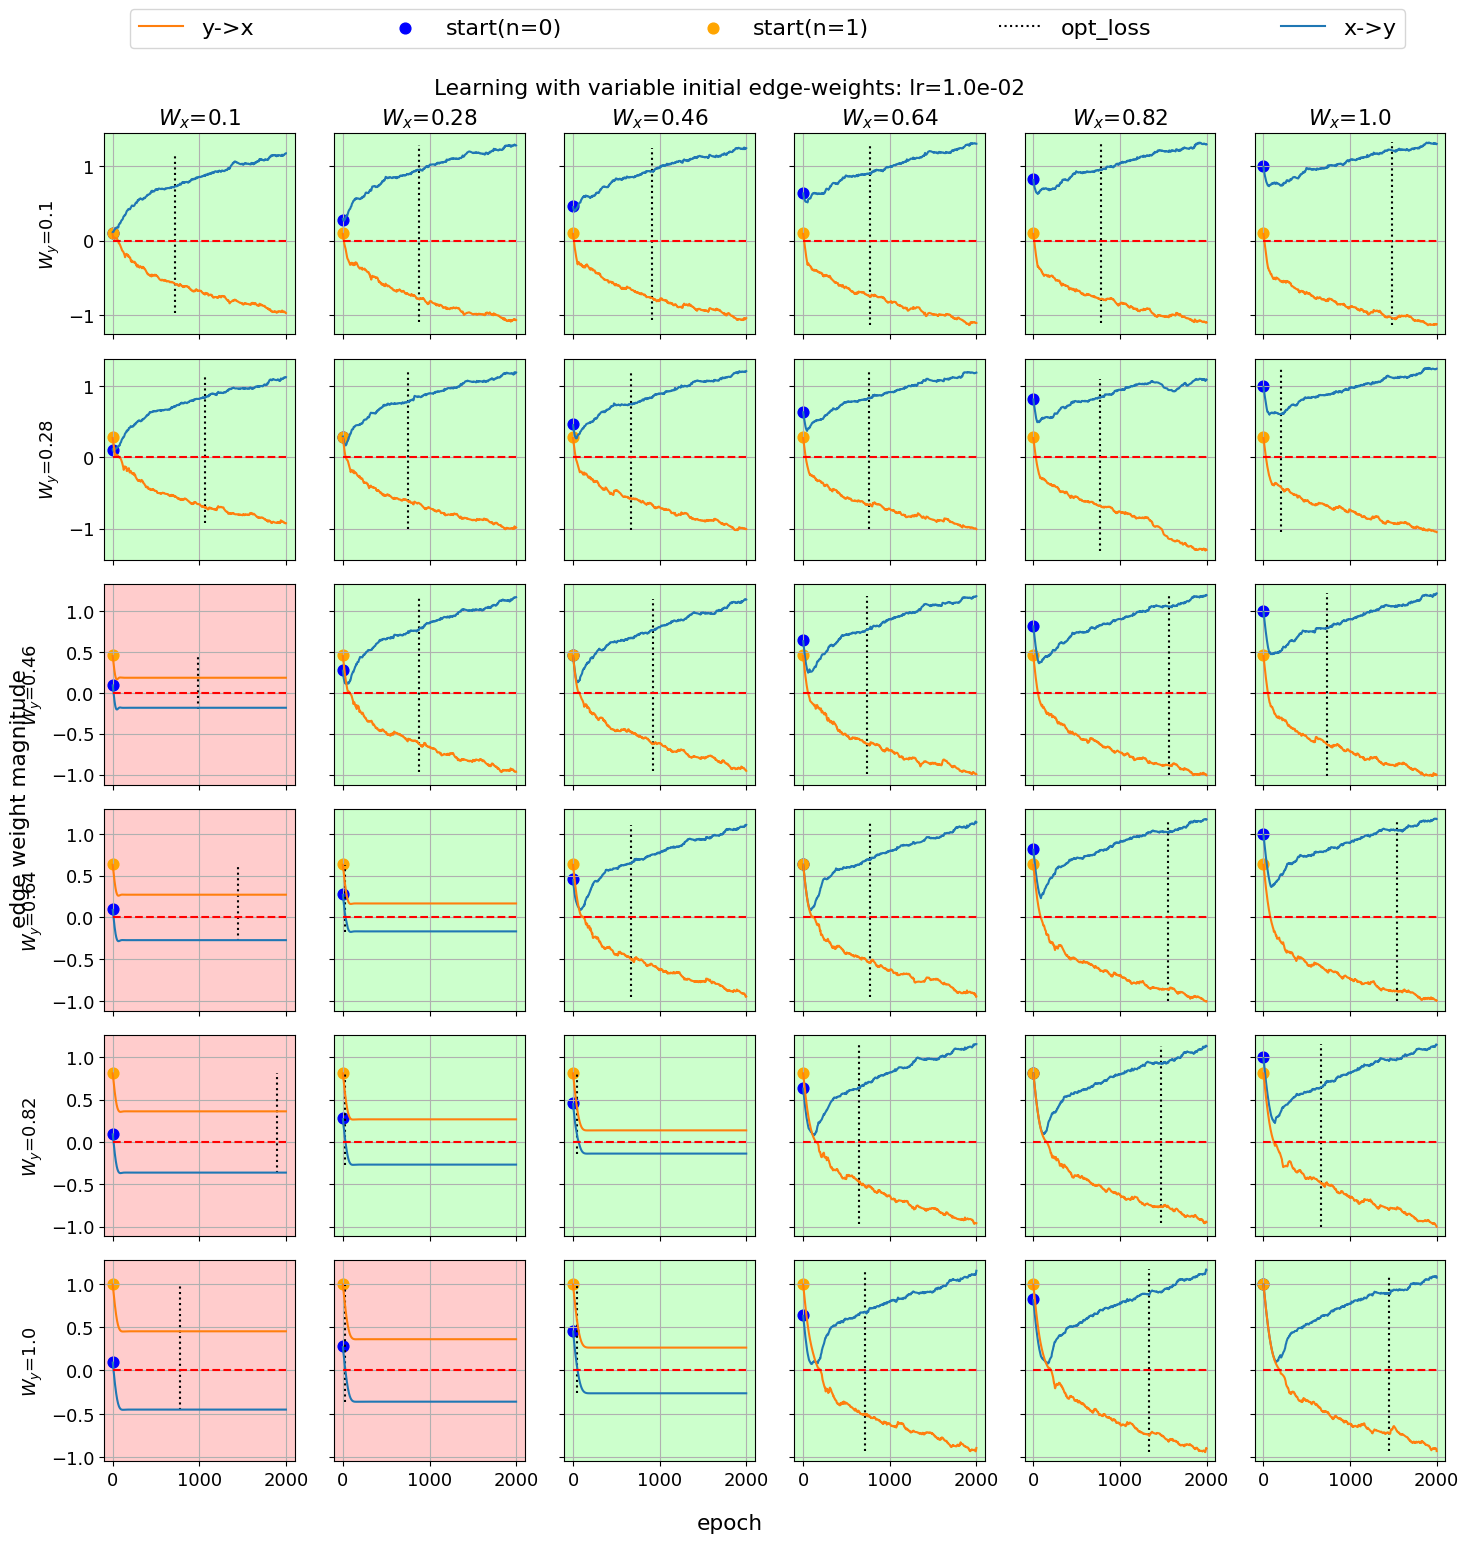

weights=(0.705, -0.556), comp direction= 1, opt_epoch=1385
weights=(0.786, -0.647), comp direction= 1, opt_epoch=1475
weights=(0.711, -0.576), comp direction= 1, opt_epoch=930
weights=(0.860, -0.709), comp direction= 1, opt_epoch=1605
weights=(0.906, -0.746), comp direction= 1, opt_epoch=1480
weights=(0.926, -0.778), comp direction= 1, opt_epoch=1610
weights=(0.694, -0.564), comp direction= 1, opt_epoch=1440
weights=(0.680, -0.565), comp direction= 1, opt_epoch=1200
weights=(0.668, -0.540), comp direction= 1, opt_epoch=1080
weights=(0.805, -0.654), comp direction= 1, opt_epoch=1565
weights=(0.857, -0.710), comp direction= 1, opt_epoch=1560
weights=(0.878, -0.733), comp direction= 1, opt_epoch=1630
weights=(-0.184, 0.184), comp direction=-1, opt_epoch=390
weights=(0.672, -0.544), comp direction= 1, opt_epoch=1455
weights=(0.535, -0.415), comp direction= 1, opt_epoch=815
weights=(0.536, -0.406), comp direction= 1, opt_epoch=670
weights=(0.771, -0.635), comp direction= 1, opt_epoch=1385
w

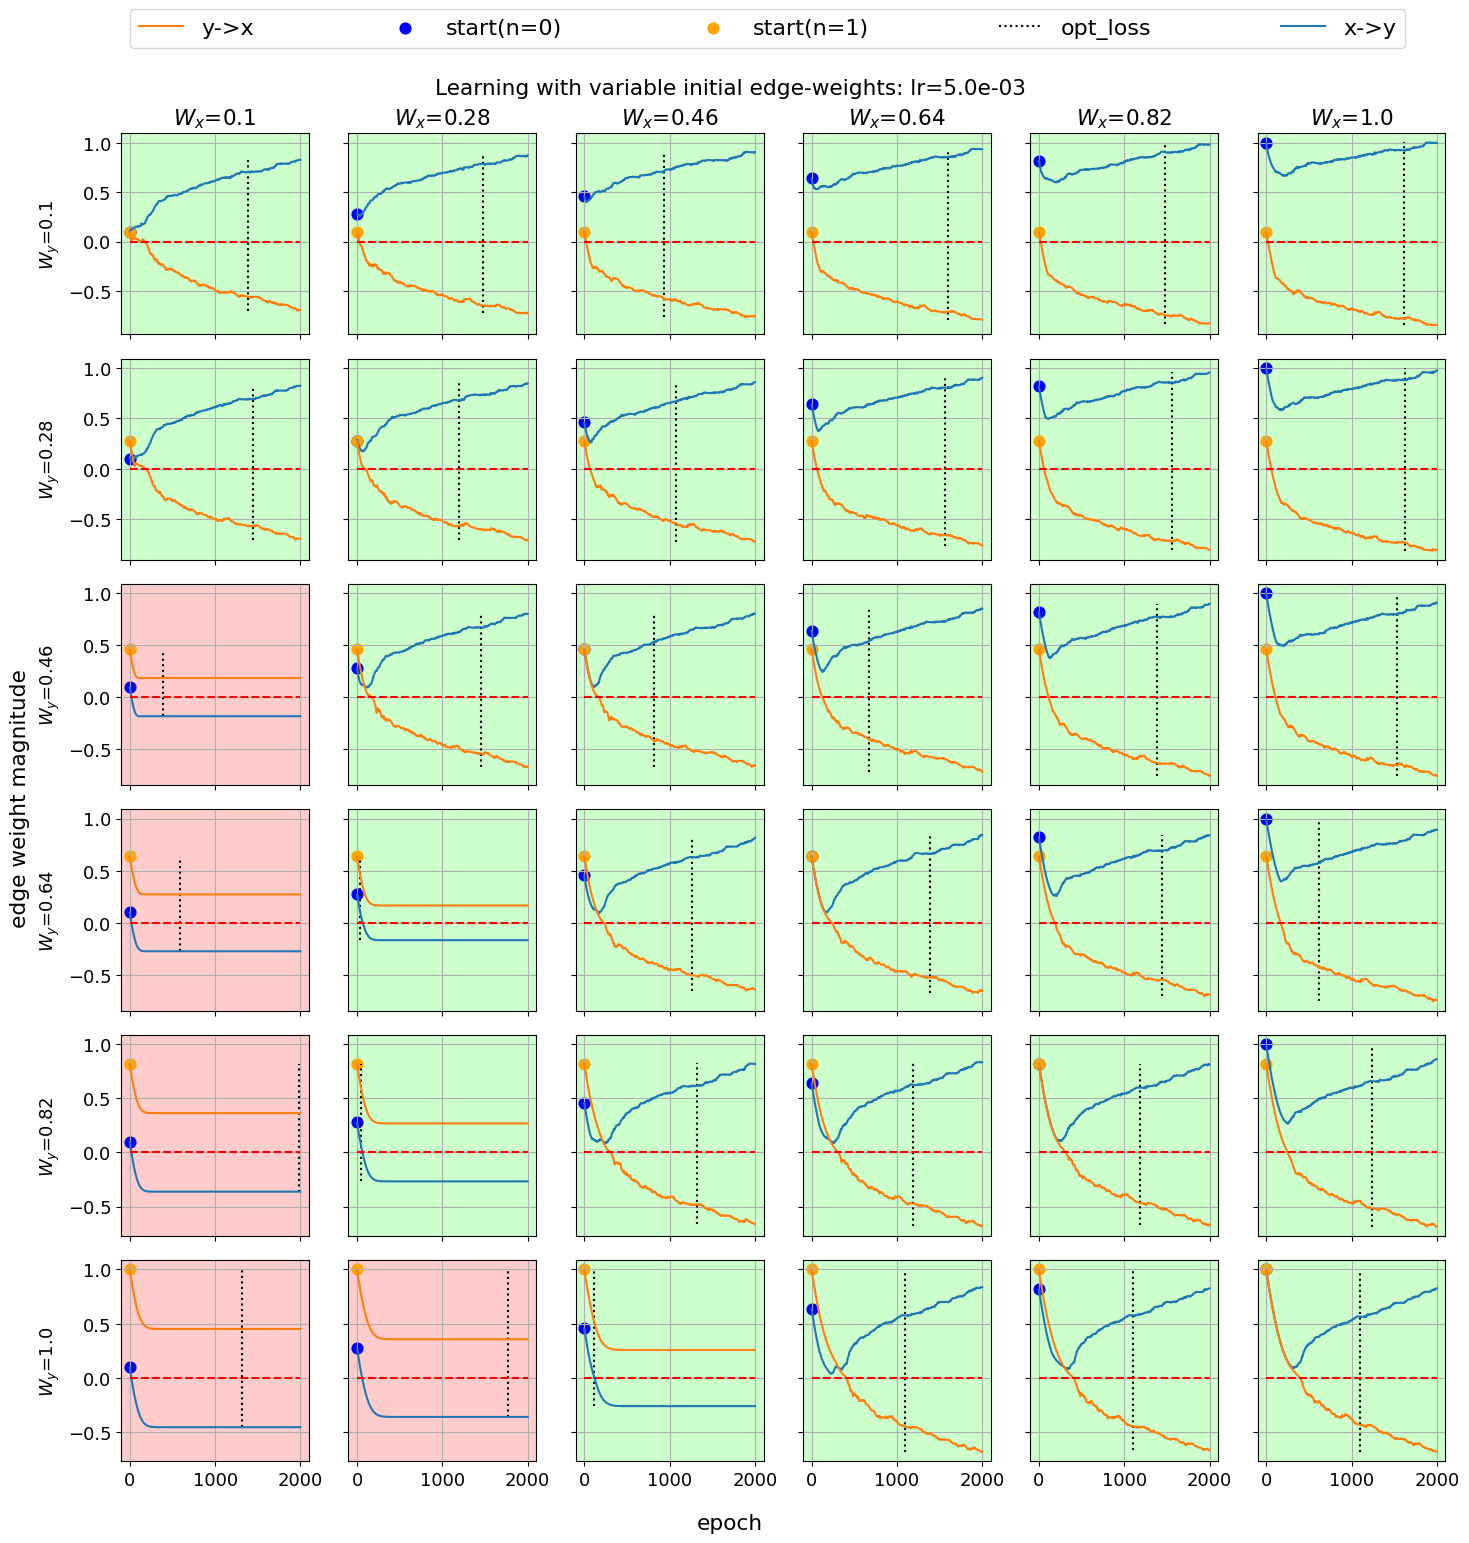

In [6]:
for lr in [1e-1, 5e-2, 1e-2, 5e-3]:
    collect_data(df, lr=lr, use_lowest_loss=True)